# Decide on QC Metrics and Thresholds

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import datetime
import pygmt
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from pyproj import Transformer



In [2]:
df = pd.read_csv('/wd1/hbito_data/data/datasets_all_regions/origin_2010_2015_reloc_cog_ver3_cc.csv',index_col=0)
df


,lat,lon,depth,time,orid,nass,p_picks,s_picks,rms,nsphz,gap,algorithm
0,47.13396,-122.09098,60.1470,1.262305e+09,0,7,2,5,1.081,5.0,243.895048,genie
7,48.17742,-121.83289,6.1630,1.262305e+09,1,55,25,30,0.985,30.0,197.622556,genie
62,47.85353,-122.12435,18.2960,1.262330e+09,2,28,10,18,0.784,18.0,179.587425,genie
90,47.97665,-122.90617,20.9100,1.262336e+09,3,20,10,10,0.465,10.0,153.822127,genie
110,45.86019,-122.19002,8.4035,1.262362e+09,4,39,20,19,0.657,19.0,238.225383,genie
...,...,...,...,...,...,...,...,...,...,...,...,...
1004270,40.59877,-124.40572,20.4825,1.435097e+09,63882,23,9,14,1.015,14.0,77.202555,genie
1004293,40.62611,-127.11445,18.5140,1.435100e+09,63883,12,1,11,0.744,11.0,221.215338,genie
1004305,49.76714,-124.52950,3.6850,1.435101e+09,63884,13,7,6,0.894,6.0,205.239215,genie
1004318,40.66547,-125.33902,3.0525,1.435101e+09,63885,8,3,5,0.982,5.0,141.141631,genie


## Histogram of picks for all events

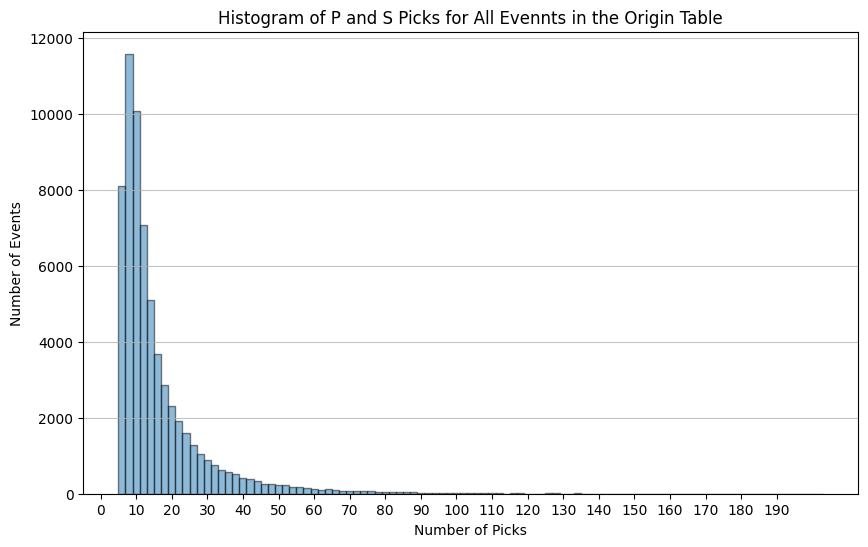

In [3]:
bins = np.linspace(df['nass'].min(), df['nass'].max(), 100)
plt.figure(figsize=(10, 6))
plt.hist(df['nass'],bins=bins, alpha=0.5, edgecolor='black')
plt.title('Histogram of P and S Picks for All Evennts in the Origin Table')
plt.xlabel('Number of Picks')
plt.ylabel('Number of Events')
plt.xticks(np.arange(0, 200, 10))
plt.grid(axis='y', alpha=0.75)

## Histogram of P picks for all events

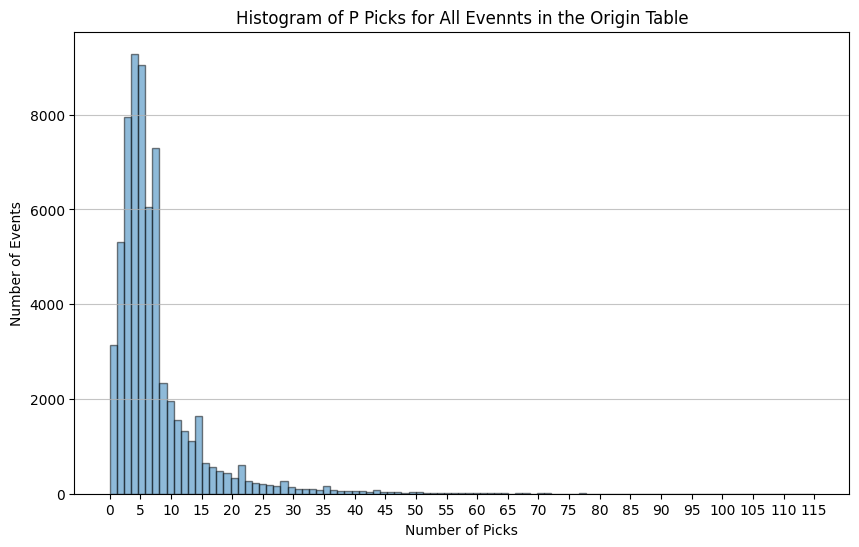

In [4]:
bins = np.linspace(df['p_picks'].min(), df['p_picks'].max(), 100)
plt.figure(figsize=(10, 6))
plt.hist(df['p_picks'],bins=bins, alpha=0.5, edgecolor='black')
plt.title('Histogram of P Picks for All Evennts in the Origin Table')
plt.xlabel('Number of Picks')
plt.ylabel('Number of Events')
plt.xticks(np.arange(0, 120, 5))

plt.grid(axis='y', alpha=0.75)

## Histogram of S picks for all events

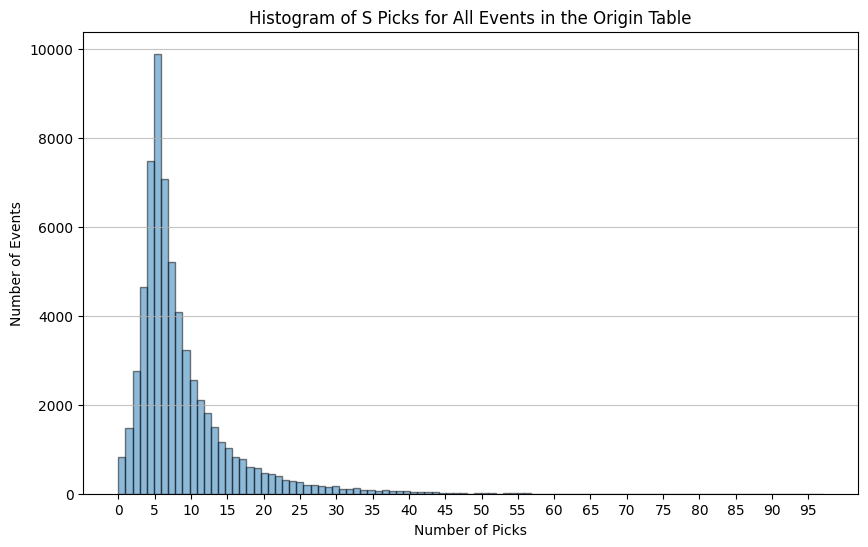

In [5]:
bins = np.linspace(df['s_picks'].min(), df['s_picks'].max(), 100)
plt.figure(figsize=(10, 6))
plt.hist(df['s_picks'],bins=bins, alpha=0.5, edgecolor='black')
plt.title('Histogram of S Picks for All Events in the Origin Table')
plt.xlabel('Number of Picks')
plt.ylabel('Number of Events')
plt.xticks(np.arange(0, 100, 5))
plt.grid(axis='y', alpha=0.75)

### Histograms of P and S picks combined

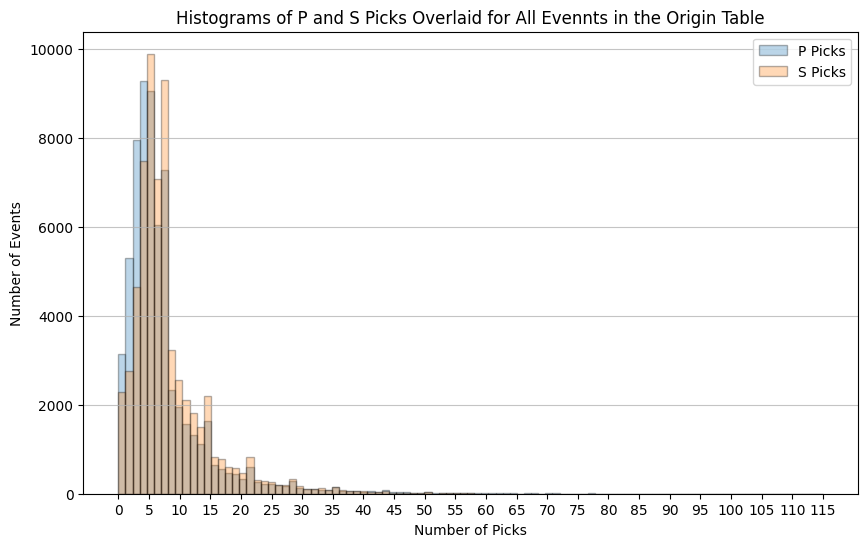

In [6]:
bins = np.linspace(df['p_picks'].min(), df['p_picks'].max(), 100)
plt.figure(figsize=(10, 6))
plt.hist(df['p_picks'],bins=bins, alpha=0.3, edgecolor='black', label='P Picks')
plt.hist(df['s_picks'], bins=bins, alpha=0.3, edgecolor='black', label='S Picks')

plt.title('Histograms of P and S Picks Overlaid for All Evennts in the Origin Table')
plt.xlabel('Number of Picks')
plt.ylabel('Number of Events')
plt.xticks(np.arange(0, 120, 5))
plt.legend()
plt.grid(axis='y', alpha=0.75)

## Histogram of RMS for all events

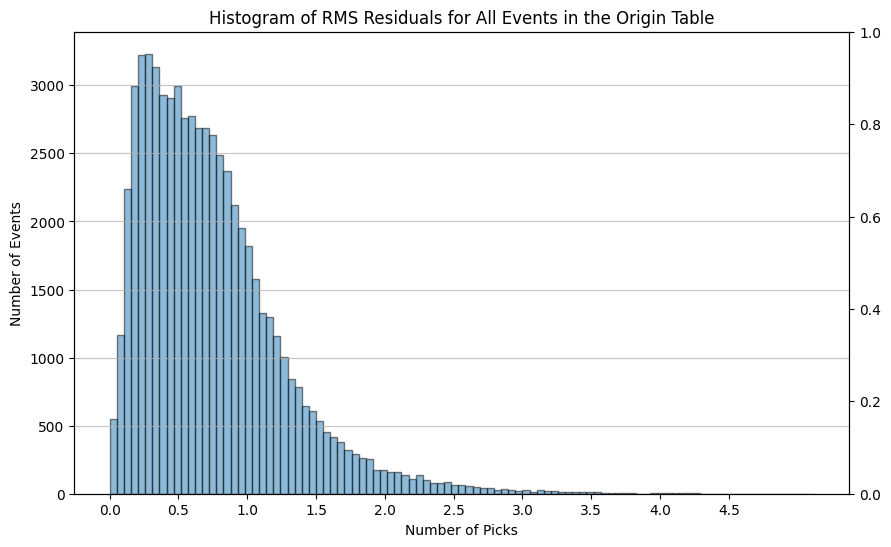

In [7]:
bins = np.linspace(df['rms'].min(), df['rms'].max(), 100)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax2 = ax.twinx()

ax.hist(df['rms'],bins=bins, alpha=0.5, edgecolor='black')
ax.set_title('Histogram of RMS Residuals for All Events in the Origin Table')
ax.set_xlabel('Number of Picks')
ax.set_ylabel('Number of Events')
ax.set_xticks(np.arange(0, 5, 0.5))
ax.grid(axis='y', alpha=0.75)

## Histogram of Gap for all events

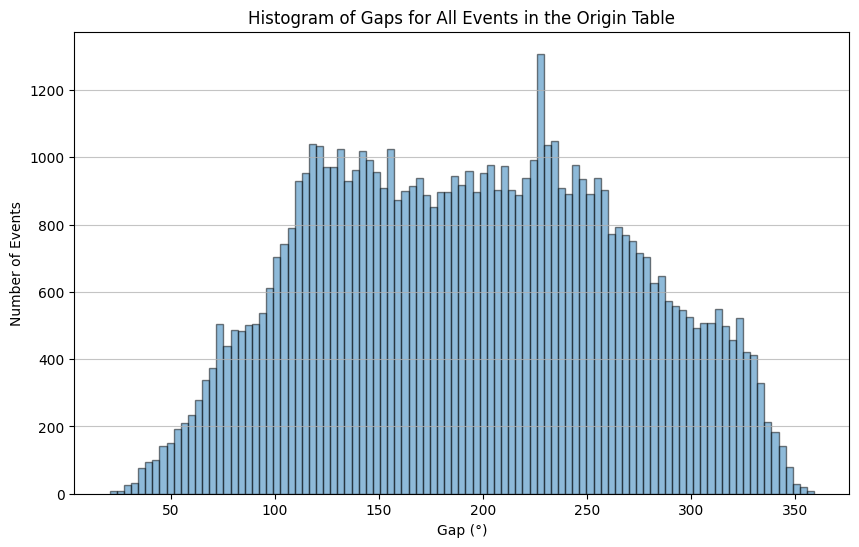

In [8]:
bins = np.linspace(df['gap'].min(), df['gap'].max(), 100)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
# ax2 = ax.twinx()

ax.hist(df['gap'],bins=bins, alpha=0.5, edgecolor='black')
ax.set_title('Histogram of Gaps for All Events in the Origin Table')
ax.set_xlabel('Gap (°)')
ax.set_ylabel('Number of Events')
ax.grid(axis='y', alpha=0.75)

### Histogram of Non-Dimensional Distance
The non-dimensional distance is defined as:

$$
\text{NonDimDist} = \sqrt{\left(\frac{\Delta t}{120}\right)^2 + \left(\frac{\Delta x}{25}\right)^2}
$$

#### Histogram of Non-Dimensional Distance for all events

In [1]:
# bins = np.linspace(df['NonDimDist'].min(), df['NonDimDist'].max(), 100)
# fig = plt.figure(figsize=(10, 6))
# ax = fig.add_subplot(111)
# # ax2 = ax.twinx()

# ax.hist(df['NonDimDist'],bins=bins, alpha=0.5, edgecolor='black')
# ax.set_yscale('log')
# ax.set_title('Non-Dimensional Distance of All Events in the Origin Table')
# ax.set_xlabel('Non-Dimensional Distance: sqrt((Δt/120)^2+(Δx/25)^2)')
# ax.set_ylabel('Number of Events (Log Scale)')
# ax.grid(axis='y', alpha=0.75)

#### Histogram of Non-Dimensional Distance with NonDimDist < 0.1

In [2]:
# thd_non_dim_dist = 0.1
# df_filter1 = df[df['NonDimDist'] < thd_non_dim_dist]
# bins = np.linspace(df_filter1['NonDimDist'].min(), df_filter1['NonDimDist'].max(), 100)
# fig = plt.figure(figsize=(10, 6))
# ax = fig.add_subplot(111)
# ax2 = ax.twinx()

# ax2.hist(df_filter1['NonDimDist'],bins=bins, alpha=0.3, edgecolor='black',color='blue',label="Linear Scale")
# ax2.set_ylabel('Number of Events')

# ax.hist(df_filter1['NonDimDist'],bins=bins, alpha=0.3, edgecolor='black',color='orange',label="Log Scale")
# ax.set_yscale('log')
# ax.set_title(f'Non-Dimensional Distance of Events in the Origin Table: NonDimDist < {thd_non_dim_dist}. Num. Events: {len(df_filter1)}')
# ax.set_xlabel('Non-Dimensional Distance: sqrt((Δt/120)^2+(Δx/25)^2)')
# ax.set_ylabel('Number of Events (Log Scale)')
# ax.grid(axis='y', alpha=0.75)

# # Get handles and labels from both axes
# handles1, labels1 = ax.get_legend_handles_labels()
# handles2, labels2 = ax2.get_legend_handles_labels()

# # Combine them
# handles = handles1 + handles2
# labels = labels1 + labels2

# # Add the combined legend to one of the axes
# ax.legend(handles, labels, loc='upper right')




#### Histogram of Non-Dimensional Distance with NonDimDist < 0.2

In [3]:
# thd_non_dim_dist = 0.2
# df_filter3 = df[df['NonDimDist'] < thd_non_dim_dist]
# bins = np.linspace(df_filter3['NonDimDist'].min(), df_filter3['NonDimDist'].max(), 100)
# fig = plt.figure(figsize=(10, 6))
# ax = fig.add_subplot(111)
# ax2 = ax.twinx()

# ax2.hist(df_filter3['NonDimDist'],bins=bins, alpha=0.3, edgecolor='black',color='blue',label="Linear Scale")
# ax2.set_ylabel('Number of Events')

# ax.hist(df_filter3['NonDimDist'],bins=bins, alpha=0.3, edgecolor='black',color='orange',label="Log Scale")
# ax.set_yscale('log')
# ax.set_title(f'Non-Dimensional Distance of Events in the Origin Table: NonDimDist < {thd_non_dim_dist}. Num. Events: {len(df_filter3)}')
# ax.set_xlabel('Non-Dimensional Distance: sqrt((Δt/120)^2+(Δx/25)^2)')
# ax.set_ylabel('Number of Events (Log Scale)')
# ax.grid(axis='y', alpha=0.75)

# # Get handles and labels from both axes
# handles1, labels1 = ax.get_legend_handles_labels()
# handles2, labels2 = ax2.get_legend_handles_labels()

# # Combine them
# handles = handles1 + handles2
# labels = labels1 + labels2

# # Add the combined legend to one of the axes
# ax.legend(handles, labels, loc='upper right')




#### Histogram of Non-Dimensional Distance with NonDimDist < sqrt(2)

In [4]:
# thd_non_dim_dist = np.sqrt(2)
# df_filter2 = df[df['NonDimDist'] < thd_non_dim_dist]
# bins = np.linspace(df_filter2['NonDimDist'].min(), df_filter2['NonDimDist'].max(), 100)
# fig = plt.figure(figsize=(10, 6))
# ax = fig.add_subplot(111)
# ax2 = ax.twinx()

# ax2.hist(df_filter2['NonDimDist'],bins=bins, alpha=0.3, edgecolor='black',color='blue',label="Linear Scale")
# ax2.set_ylabel('Number of Events')

# ax.hist(df_filter2['NonDimDist'],bins=bins, alpha=0.3, edgecolor='black',color='orange',label="Log Scale")
# ax.set_yscale('log')
# ax.set_title(f'Non-Dimensional Distance of Events in the Origin Table: NonDimDist < {round(thd_non_dim_dist,3)}. Num. Events: {len(df_filter2)}')
# ax.set_xlabel('Non-Dimensional Distance: sqrt((Δt/120)^2+(Δx/25)^2)')
# ax.set_ylabel('Number of Events (Log Scale)')
# ax.grid(axis='y', alpha=0.75)

# # Get handles and labels from both axes
# handles1, labels1 = ax.get_legend_handles_labels()
# handles2, labels2 = ax2.get_legend_handles_labels()

# # Combine them
# handles = handles1 + handles2
# labels = labels1 + labels2

# # Add the combined legend to one of the axes
# ax.legend(handles, labels, loc='upper right')




### Filter by RMS

#### P and S Picks > 4 and RMS < 2.5

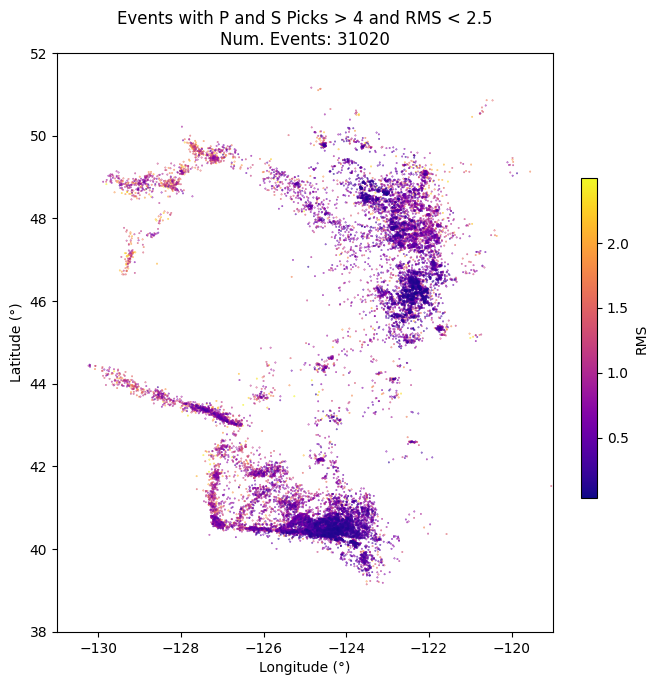

In [9]:
plt.figure(figsize=(8, 8))

# Filter and sort the data
_df = df[(df.rms<2.5) & (df.p_picks > 4) & (df.s_picks > 4)].sort_values('rms', ascending=False)

# Create the scatter plot
scatter = plt.scatter(
    _df['lon'], _df['lat'], 
    c=_df['rms'], cmap='plasma', s=0.1
)

# Add a colorbar with a label
cbar = plt.colorbar(scatter, label='RMS')
cbar.ax.set_position([0.78, 0.3, 0.03, 0.4])  # Adjust colorbar position

# Add labels, title, and axis limits
plt.xlabel('Longitude (°)')
plt.ylabel('Latitude (°)')
plt.title(f'Events with P and S Picks > 4 and RMS < 2.5\nNum. Events: {len(_df)}')
plt.xlim(-131, -119)
plt.ylim(38, 52)

# Ensure the aspect ratio is equal
plt.gca().set_aspect('equal', adjustable='box')

# Show the plot
plt.show()

In [13]:
_df["datetime"] = _df["time"].apply(datetime.datetime.fromtimestamp, tz=datetime.timezone.utc)
_df = _df.sort_values(by="orid")
_df

,lat,lon,depth,time,orid,nass,p_picks,s_picks,rms,nsphz,gap,algorithm,datetime
7,48.17742,-121.83289,6.1630,1.262305e+09,1,55,25,30,0.985,30.0,197.622556,genie,2010-01-01 00:16:49.343000+00:00
62,47.85353,-122.12435,18.2960,1.262330e+09,2,28,10,18,0.784,18.0,179.587425,genie,2010-01-01 07:18:03.837000+00:00
90,47.97665,-122.90617,20.9100,1.262336e+09,3,20,10,10,0.465,10.0,153.822127,genie,2010-01-01 08:51:56.196000+00:00
110,45.86019,-122.19002,8.4035,1.262362e+09,4,39,20,19,0.657,19.0,238.225383,genie,2010-01-01 16:12:43.926000+00:00
149,48.47310,-123.04700,20.6355,1.262370e+09,5,33,16,17,0.429,17.0,62.004725,genie,2010-01-01 18:16:53.111999+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004153,49.76815,-124.51205,3.5885,1.435086e+09,63877,16,9,7,0.484,7.0,227.532026,genie,2015-06-23 18:55:29.384999+00:00
1004169,40.74956,-124.25301,22.7025,1.435086e+09,63878,37,13,24,0.907,24.0,53.849757,genie,2015-06-23 18:59:51.592999+00:00
1004215,40.57046,-124.29327,18.0040,1.435090e+09,63880,43,18,25,0.756,25.0,77.280783,genie,2015-06-23 19:59:16.246000+00:00
1004270,40.59877,-124.40572,20.4825,1.435097e+09,63882,23,9,14,1.015,14.0,77.202555,genie,2015-06-23 22:11:13.828000+00:00


In [14]:
_df.to_csv('/wd1/hbito_data/data/datasets_all_regions/origin_2010_2015_reloc_cog_ver3_cc_p_4_s_4_rms_2_5.csv')

In [15]:
_df

,lat,lon,depth,time,orid,nass,p_picks,s_picks,rms,nsphz,gap,algorithm,datetime
7,48.17742,-121.83289,6.1630,1.262305e+09,1,55,25,30,0.985,30.0,197.622556,genie,2010-01-01 00:16:49.343000+00:00
62,47.85353,-122.12435,18.2960,1.262330e+09,2,28,10,18,0.784,18.0,179.587425,genie,2010-01-01 07:18:03.837000+00:00
90,47.97665,-122.90617,20.9100,1.262336e+09,3,20,10,10,0.465,10.0,153.822127,genie,2010-01-01 08:51:56.196000+00:00
110,45.86019,-122.19002,8.4035,1.262362e+09,4,39,20,19,0.657,19.0,238.225383,genie,2010-01-01 16:12:43.926000+00:00
149,48.47310,-123.04700,20.6355,1.262370e+09,5,33,16,17,0.429,17.0,62.004725,genie,2010-01-01 18:16:53.111999+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004153,49.76815,-124.51205,3.5885,1.435086e+09,63877,16,9,7,0.484,7.0,227.532026,genie,2015-06-23 18:55:29.384999+00:00
1004169,40.74956,-124.25301,22.7025,1.435086e+09,63878,37,13,24,0.907,24.0,53.849757,genie,2015-06-23 18:59:51.592999+00:00
1004215,40.57046,-124.29327,18.0040,1.435090e+09,63880,43,18,25,0.756,25.0,77.280783,genie,2015-06-23 19:59:16.246000+00:00
1004270,40.59877,-124.40572,20.4825,1.435097e+09,63882,23,9,14,1.015,14.0,77.202555,genie,2015-06-23 22:11:13.828000+00:00


In [42]:
df_arrival = pd.read_csv('../data/datasets_all_regions/arrival_2010_2015_reloc_cog_ver3.csv',index_col=0)
df_arrival

,time,arid,iphase,prob
sta,,,,
UW.PCMD,2010-01-01T00:15:27.180000Z,0,P,0.680
UW.RVW,2010-01-01T00:15:37.840400Z,1,P,0.680
UW.PCMD,2010-01-01T00:15:33.280000Z,2,S,0.680
UW.GNW,2010-01-01T00:15:42.002000Z,3,S,0.680
PB.B013,2010-01-01T00:15:43.618400Z,4,S,0.680
...,...,...,...,...
7D.J11D,2015-06-23T23:18:40.885798Z,1004330,S,0.694
7D.G35D,2015-06-23T23:18:48.573898Z,1004331,S,0.694
7D.J19D,2015-06-23T23:18:50.458298Z,1004332,S,0.694


In [43]:
df_assoc = pd.read_csv('../data/datasets_all_regions/assoc_2010_2015_reloc_cog_ver3.csv',index_col=0)[['orid','arid','sta']]
df_assoc

,orid,arid,sta
0,0,0,UW.PCMD
1,0,1,UW.RVW
2,0,2,UW.PCMD
3,0,3,UW.GNW
4,0,4,PB.B013
...,...,...,...
1004330,63886,1004330,7D.J11D
1004331,63886,1004331,7D.G35D
1004332,63886,1004332,7D.J19D
1004333,63886,1004333,7D.J10D


In [44]:
df_picks = df_assoc.merge(df_arrival, on='arid', how='inner')[['orid','arid','sta','iphase','time']]
df_picks = df_picks.rename(columns={'time':'time_pick'})
df_picks

,orid,arid,sta,iphase,time_pick
0,0,0,UW.PCMD,P,2010-01-01T00:15:27.180000Z
1,0,1,UW.RVW,P,2010-01-01T00:15:37.840400Z
2,0,2,UW.PCMD,S,2010-01-01T00:15:33.280000Z
3,0,3,UW.GNW,S,2010-01-01T00:15:42.002000Z
4,0,4,PB.B013,S,2010-01-01T00:15:43.618400Z
...,...,...,...,...,...
1004330,63886,1004330,7D.J11D,S,2015-06-23T23:18:40.885798Z
1004331,63886,1004331,7D.G35D,S,2015-06-23T23:18:48.573898Z
1004332,63886,1004332,7D.J19D,S,2015-06-23T23:18:50.458298Z
1004333,63886,1004333,7D.J10D,S,2015-06-23T23:18:56.689277Z


In [45]:
df_pick_assignments = _df.merge(df_picks, on='orid', how='inner')
df_pick_assignments

,Unnamed: 0,lat,lon,depth,time,orid,nass,p_picks,s_picks,rms,...,algorithm,id_Morton,dist,dt,NonDimDist,datetime,arid,sta,iphase,time_pick
0,27593,40.46402,-124.63921,21.674,1.350339e+09,27593,33,14,19,2.498,...,genie,676,0.043925,1.489598e+00,0.012537,2012-10-15 22:03:37.489598+00:00,416705,7D.FS10B,P,2012-10-15T22:03:42.932152Z
1,27593,40.46402,-124.63921,21.674,1.350339e+09,27593,33,14,19,2.498,...,genie,676,0.043925,1.489598e+00,0.012537,2012-10-15 22:03:37.489598+00:00,416706,7D.FS01B,P,2012-10-15T22:03:43.400762Z
2,27593,40.46402,-124.63921,21.674,1.350339e+09,27593,33,14,19,2.498,...,genie,676,0.043925,1.489598e+00,0.012537,2012-10-15 22:03:37.489598+00:00,416707,7D.FS04B,P,2012-10-15T22:03:43.404052Z
3,27593,40.46402,-124.63921,21.674,1.350339e+09,27593,33,14,19,2.498,...,genie,676,0.043925,1.489598e+00,0.012537,2012-10-15 22:03:37.489598+00:00,416708,7D.FS20B,P,2012-10-15T22:03:43.466048Z
4,27593,40.46402,-124.63921,21.674,1.350339e+09,27593,33,14,19,2.498,...,genie,676,0.043925,1.489598e+00,0.012537,2012-10-15 22:03:37.489598+00:00,416709,NC.KCT,P,2012-10-15T22:03:44.190000Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730148,774,48.46791,-123.44927,20.314,1.264059e+09,774,10,5,5,0.032,...,genie,0,1.152438,4.758315e+07,396526.218818,2010-01-21 07:29:40.741805+00:00,9779,PB.B009,S,2010-01-21T07:29:48.018400Z
730149,774,48.46791,-123.44927,20.314,1.264059e+09,774,10,5,5,0.032,...,genie,0,1.152438,4.758315e+07,396526.218818,2010-01-21 07:29:40.741805+00:00,9780,PB.B010,S,2010-01-21T07:29:48.068400Z
730150,774,48.46791,-123.44927,20.314,1.264059e+09,774,10,5,5,0.032,...,genie,0,1.152438,4.758315e+07,396526.218818,2010-01-21 07:29:40.741805+00:00,9781,PB.B006,S,2010-01-21T07:29:54.388400Z
730151,774,48.46791,-123.44927,20.314,1.264059e+09,774,10,5,5,0.032,...,genie,0,1.152438,4.758315e+07,396526.218818,2010-01-21 07:29:40.741805+00:00,9782,PB.B005,S,2010-01-21T07:29:54.428400Z


,time,arid,iphase,prob
sta,,,,
UW.PCMD,2010-01-01T00:15:27.180000Z,0,P,0.680
UW.RVW,2010-01-01T00:15:37.840400Z,1,P,0.680
UW.PCMD,2010-01-01T00:15:33.280000Z,2,S,0.680
UW.GNW,2010-01-01T00:15:42.002000Z,3,S,0.680
PB.B013,2010-01-01T00:15:43.618400Z,4,S,0.680
...,...,...,...,...
7D.J11D,2015-06-23T23:18:40.885798Z,1004330,S,0.694
7D.G35D,2015-06-23T23:18:48.573898Z,1004331,S,0.694
7D.J19D,2015-06-23T23:18:50.458298Z,1004332,S,0.694


In [15]:
_df

,lat,lon,depth,time,orid,nass,p_picks,s_picks,rms,nsphz,gap,algorithm,id_Morton,dist,dt,NonDimDist,datetime
27593,40.46402,-124.63921,21.674,1.350339e+09,27593,33,14,19,2.498,19.0,70.689876,genie,676,0.043925,1.489598e+00,0.012537,2012-10-15 22:03:37.489598+00:00
33313,40.46453,-124.64685,19.221,1.363883e+09,33313,23,9,14,2.497,14.0,104.305083,genie,1239,0.064674,1.564381e+03,13.036509,2013-03-21 16:22:28.381014+00:00
44330,49.75784,-123.42677,4.296,1.395439e+09,44330,10,5,5,2.494,5.0,273.037707,genie,1821,1.710027,9.866703e+03,82.222555,2014-03-21 21:53:00.703153+00:00
42581,49.04914,-122.09718,13.249,1.393710e+09,42581,26,16,10,2.491,10.0,254.509741,genie,1805,1.868034,6.251413e+04,520.951049,2014-03-01 21:39:46.874711+00:00
36355,40.39732,-124.58839,16.076,1.371875e+09,36355,22,9,13,2.491,13.0,206.224926,genie,1556,0.607235,5.253552e+04,437.796015,2013-06-22 04:16:06.478228+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1542,46.14740,-122.14032,44.614,1.266069e+09,1542,10,5,5,0.044,5.0,123.524895,genie,0,1.406842,4.557335e+07,379777.923383,2010-02-13 13:46:16.194077+00:00
8390,48.79538,-123.26321,-0.782,1.293723e+09,8390,10,5,5,0.043,5.0,159.143198,genie,0,1.473689,1.791899e+07,149324.956402,2010-12-30 15:32:12.231767+00:00
8590,48.57995,-123.03222,13.812,1.294554e+09,8590,10,5,5,0.042,5.0,230.479217,genie,0,1.268354,1.708779e+07,142398.279265,2011-01-09 06:25:33.488215+00:00
41383,46.32146,-122.37012,13.638,1.390093e+09,41383,10,5,5,0.036,5.0,260.537377,genie,1768,2.804629,1.094893e+04,91.241118,2014-01-19 00:59:04.074082+00:00


In [38]:
_df = pd.read_csv('../data/datasets_all_regions/origin_2010_2015_reloc_cog_morton_ver3_p_4_s_4_rms_2_5.csv')
_df["datetime"] = pd.to_datetime(_df["time"].apply(datetime.datetime.fromtimestamp, tz=datetime.timezone.utc))

#### Zoom into offshore WA

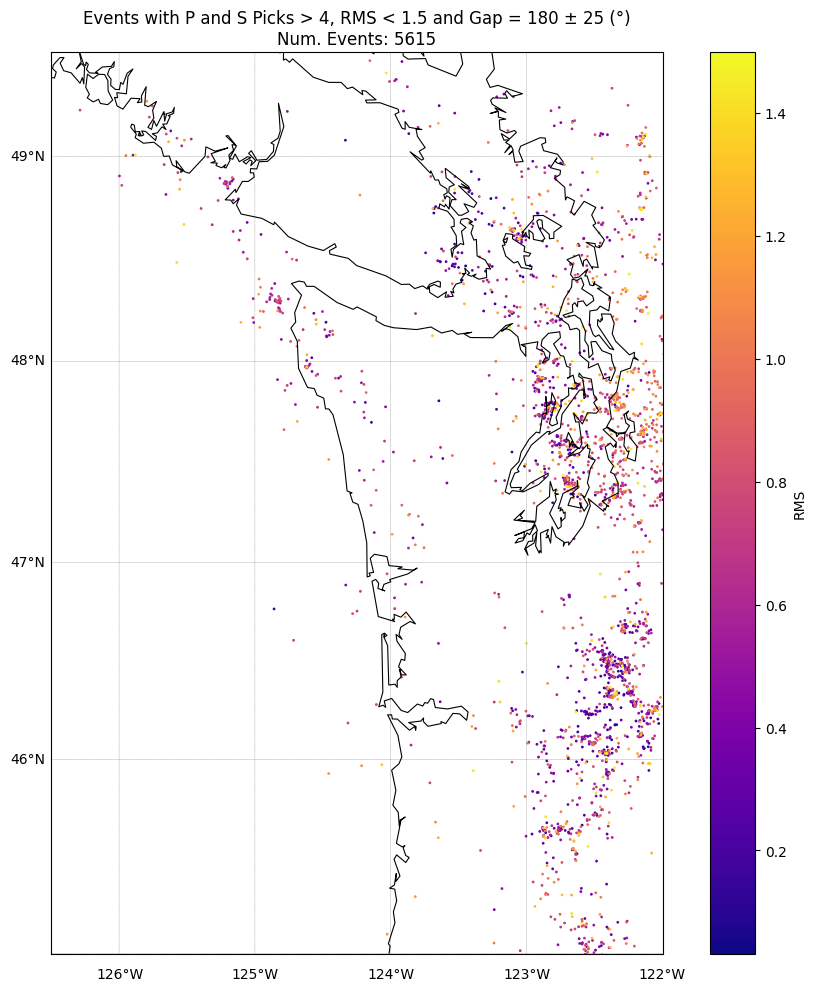

In [172]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

# Filter and sort the data
tol_deg = 25
_df = df[(df.rms < 1.5) & (abs(180 - df.gap) < tol_deg) & (df.p_picks > 4) & (df.s_picks > 4)].sort_values('rms', ascending=True)

# Set up figure
plt.figure(figsize=(10, 10))

# Create map
m = Basemap(
    projection='merc',
    llcrnrlon=-126.5, urcrnrlon=-122,
    llcrnrlat=45, urcrnrlat=49.5,
    resolution='i'
)

# Draw coastlines
m.drawcoastlines(color='black', linewidth=0.8)

# Add lat/lon grid lines with labels
parallels = range(45, 50, 1)
meridians = range(-127, -121, 1)

m.drawparallels(parallels, labels=[1,0,0,0], linewidth=0.2, fontsize=10)
m.drawmeridians(meridians, labels=[0,0,0,1], linewidth=0.2, fontsize=10)

# Convert coords and plot
x, y = m(_df['lon'].values, _df['lat'].values)
scatter = m.scatter(x, y, c=_df['rms'], cmap='plasma', s=1)

# Colorbar
cbar = plt.colorbar(scatter, label='RMS')
cbar.ax.set_position([0.85, 0.3, 0.03, 0.4])

# Title
plt.title(f'Events with P and S Picks > 4, RMS < 1.5 and Gap = 180 ± {tol_deg} (°)\nNum. Events: {len(_df)}')

plt.tight_layout()
plt.show()
